# Lab 5 : Singular Value Decomposition

**Riddhi Tanna**

**201801427**

In [2]:
#importing required libraries 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import math

ellipse = pd.read_csv('ellipse.csv')
ellipse_large = pd.read_csv('ellipse_large.csv')

In [3]:
ellipse.drop('Unnamed: 0', axis=1, inplace=True)
ellipse_large.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
ellipse_large

,xn,yn
0,-5.212386,6.618791
1,-5.337657,6.512905
2,-5.682516,6.436210
3,-5.428777,6.073008
4,-5.353282,6.227031
...,...,...
6279,-5.712570,6.688085
6280,-5.524410,6.014008
6281,-5.160837,5.954867
6282,-4.942217,6.028965


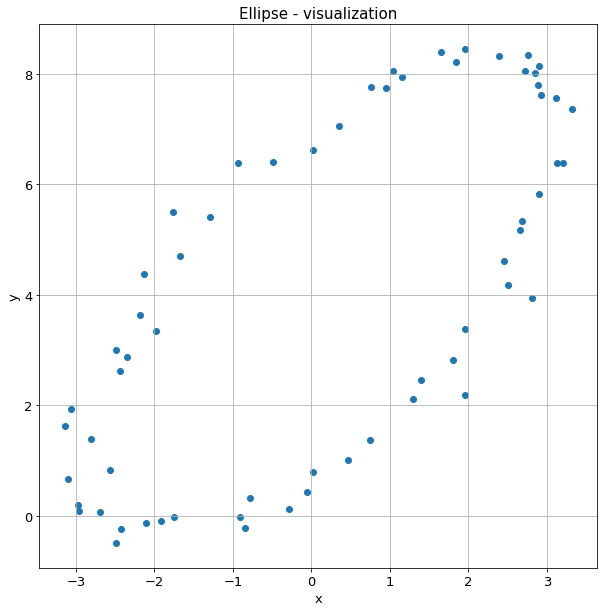

In [5]:
# plotting the scatter plot and the OLS regression line
fig, ax = plt.subplots(figsize=[10,10])

plt.scatter(ellipse['xn'], ellipse['yn'])
plt.grid()
plt.xlabel('x', fontsize = 13)
plt.ylabel('y', fontsize = 13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title('Ellipse - visualization', fontsize = 15)
#plt.legend()
plt.show()


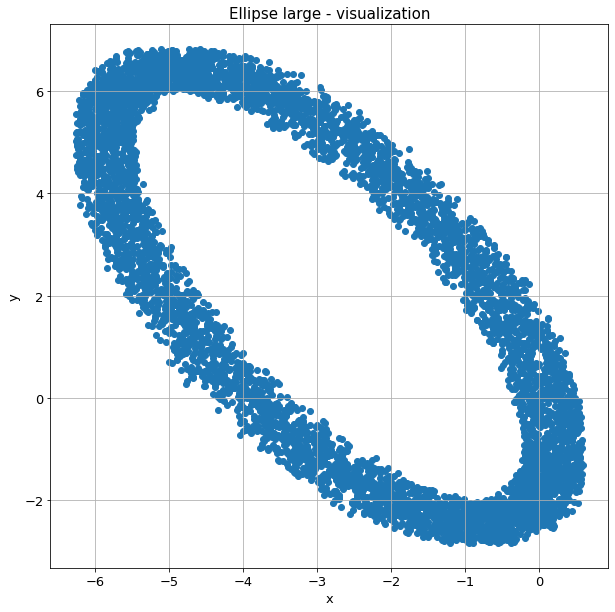

In [6]:
# plotting the scatter plot and the OLS regression line
fig, ax = plt.subplots(figsize=[10,10])

plt.scatter(ellipse_large['xn'], ellipse_large['yn'])

plt.grid()
plt.xlabel('x', fontsize = 13)
plt.ylabel('y', fontsize = 13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title('Ellipse large - visualization', fontsize = 15)
#plt.legend()
plt.show()


From the above two visualizations, we can see that both the datasets are points of different ellipses.

In [60]:
#Singular Value Decomposition
def ellipse_fit_svd(x,y):
    x = np.array(x)
    y = np.array(y)

    x_2 = x*x
    y_2 = y*y
    xy = x*y

    one = np.ones(len(x))
    mat = np.column_stack((x_2,xy,y_2,x,y,one))
    U , s , V = np.linalg.svd(mat)
    print(np.shape(U))
    print(np.shape(s))
    print(np.shape(V))
    index = np.argmin(abs(s))
    #print(index)
    vt = np.transpose(V)
    #print(V)
    #print(vt)
    x_new = vt[:,index]
    #print(x_new)
    x_plt = np.linspace(np.min(x),np.max(x),300)
    y_plt = np.linspace(np.min(y),np.max(y),300)

    x_plt,y_plt = np.meshgrid(x_plt,y_plt)
    X = x_new[0]*x_plt*x_plt + x_new[1]*x_plt*y_plt + x_new[2]*y_plt*y_plt + x_new[3]*x_plt + x_new[4]*y_plt + x_new[5]

    fig, ax = plt.subplots(figsize=[10,10])
    plt.grid()
    plt.xlabel('x', fontsize = 13)
    plt.ylabel('y', fontsize = 13)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.contour(x_plt,y_plt,X,levels=[0],colors='red')
    plt.scatter(x,y, alpha=0.3)
    plt.title('Ellipse fitting using SVD', fontsize=15)
    plt.show()
    rmse = 0
    for i in range(len(x))
        rmse = rmse + (x_new[0]*x[i]*x[i] + x_new[1]*x[i]*y[i] + x_new[2]*y[i]*y[i] + x_new[3]*x[i] + x_new[4]*y[i] + x_new[5])**2
    rmse = rmse/len(x)
    rmse = math.sqrt(rmse)
    print("RMSE for SVD : {}".format(rmse))

In [61]:
#ellipse fitting using eigenvalue with constraint b*b - 4ac < 0
def ellipse_fit_eigen(x,y):
    x = np.array(x)
    y = np.array(y)
    C = np.column_stack(([0,0,-2,0,0,0],[0,1,0,0,0,0],[-2,0,0,0,0,0],[0,0,0,0,0,0],[0,0,0,0,0,0],[0,0,0,0,0,0]))
    #C is The Constraint matrix
    
    x_2 = x*x
    y_2 = y*y
    xy = x*y
    one = np.ones(len(x))
    mat = np.column_stack((x_2,xy,y_2,x,y,one))

    s = np.transpose(mat) @ mat
    w,v = np.linalg.eig(np.linalg.inv(s) @ C)
    index = np.argmax(abs(w))
    x_fit = v[:,index]

    x_plt = np.linspace(np.min(x),np.max(x),300)
    y_plt = np.linspace(np.min(y),np.max(y),300)

    x_plt,y_plt = np.meshgrid(x_plt,y_plt)
    X = x_fit[0]*x_plt*x_plt + x_fit[1]*x_plt*y_plt + x_fit[2]*y_plt*y_plt + x_fit[3]*x_plt + x_fit[4]*y_plt + x_fit[5]


    fig, ax = plt.subplots(figsize=[10,10])
    plt.grid()
    plt.xlabel('x', fontsize = 13)
    plt.ylabel('y', fontsize = 13)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.contour(x_plt,y_plt,X,levels=[0],colors='red')
    plt.scatter(x,y, alpha=0.3)
    plt.title('Ellipse fitting using the constraint', fontsize=15)
    plt.show()
    
    rmse = 0
    for i in range(len(x)):
        rmse = rmse + (x_fit[0]*x[i]*x[i] + x_fit[1]*x[i]*y[i] + x_fit[2]*y[i]*y[i] + x_fit[3]*x[i] + x_fit[4]*y[i] + x_fit[5])**2
    rmse = rmse/len(x)
    rmse = math.sqrt(rmse)
    print("RMSE with constraint: {}".format(rmse))

(63, 63)
(6,)
(6, 6)


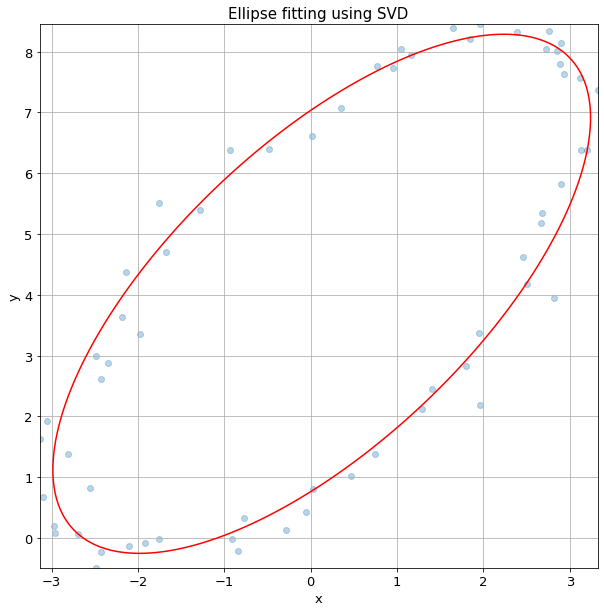

RMSE for SVD : 0.13784184591341836
(6284, 6284)
(6,)
(6, 6)


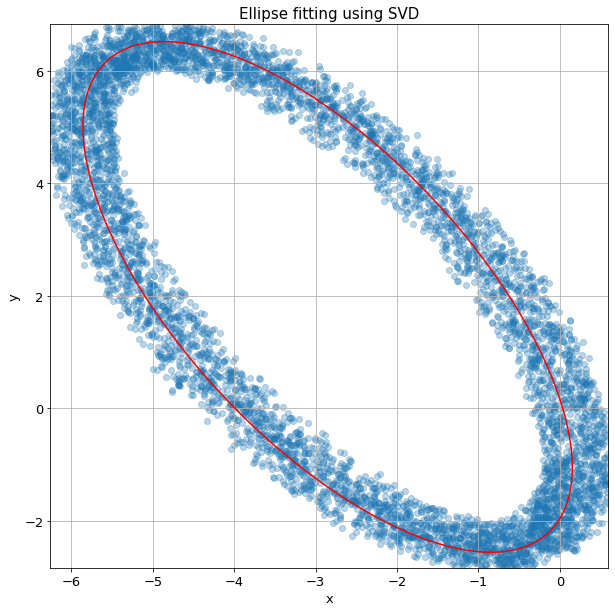

RMSE for SVD : 0.20956474089273144


In [62]:
ellipse_fit_svd(ellipse['xn'],ellipse['yn'])
ellipse_fit_svd(ellipse_large['xn'],ellipse_large['yn'])

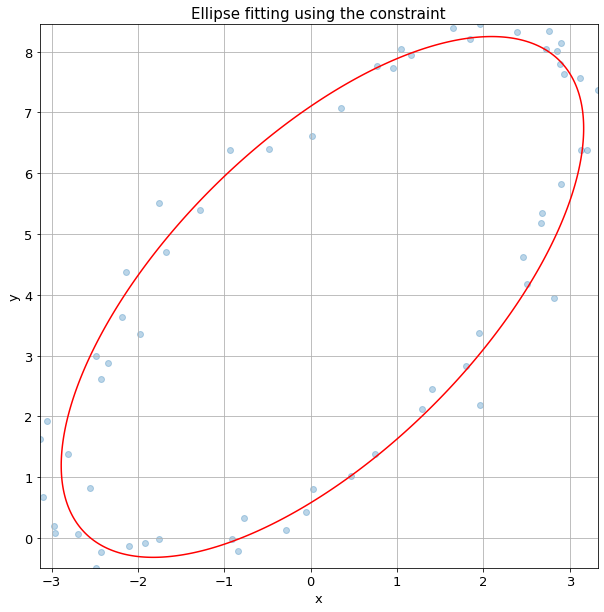

RMSE with constraint: 0.1465751186631088


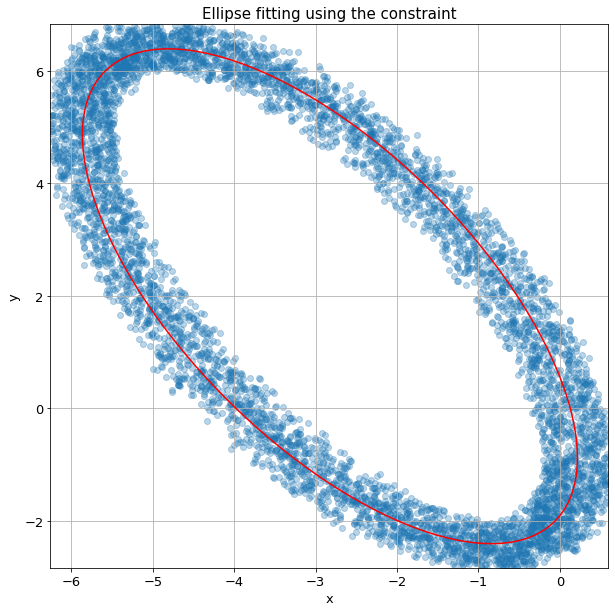

RMSE with constraint: 0.21744915203363516


In [10]:
ellipse_fit_eigen(ellipse['xn'],ellipse['yn'])
ellipse_fit_eigen(ellipse_large['xn'],ellipse_large['yn'])

## Conclusion
RMSE is a measure of how good the calculated elliptical fit so the smaller the RMSE, the better the fit.
As we can see in both the case, the Singular Value Decomposition method gives the better fit than the Constraint Matrix (eigenvalue) method since the RMSE is lower for SVD in both the cases
The larger dataset has a worse fitted ellipse than the smaller one as it has larger RMSE than the smaller ellipse. 